In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Uncomment one of these three
orientation = 'sagittal'
# orientation = 'axial'
# orientation = 'coronal'

In [3]:
if orientation == 'sagittal':
    I = plt.imread('/homes/2/iglesias/sagittal/slice_112.png')
if orientation == 'coronal':
    I = plt.imread('/homes/2/iglesias/coronal/slice_119.png')
if orientation == 'axial':
    I = plt.imread('/homes/2/iglesias/axial/slice_155.png')
    

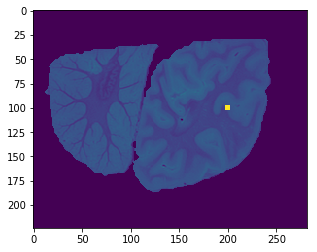

In [4]:
# Draw a white square around a pair of coordinates (x, y) and plot it
x = 100
y = 200

Isq = I.copy()
Isq[x-2:x+3, y-2:y+3] = 2
plt.imshow(Isq)


In [5]:
# Let's rotate / flip the image so it's correctly oriented
Irot = I.copy()

if orientation == 'sagittal':
    Irot = np.rot90(Irot)

if orientation == 'coronal' or orientation == 'axial':
    Irot = np.flip(np.rot90(Irot), axis=1)
   


In [6]:
# Let's update the coordinates to account for the transfom

# we'll need the center of the image
c = (np.array(I.shape) -1) / 2 

if orientation == 'sagittal':
    xnew = (-y + 2 * c[1]).astype('int')
    ynew =  x 

if orientation == 'coronal' or orientation == 'axial':
    xnew = (-y + 2 * c[1]).astype('int')
    ynew =  (2*c[0] - x).astype('int')


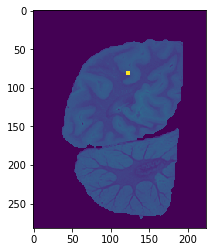

In [7]:
# When we draw a white square around the updated coordinates in the rotated image,
# the square is in the same part of the brain as before
Irot[xnew-2:xnew+3, ynew-2:ynew+3] = 2
plt.imshow(Irot)

In [8]:
# But hey: you're showing me how to go from the original view coordinates
# to the coordinates in the properly oriented images. But I want to go the 
# other way around! I mean, the user clicks on the properly oriented images,
# and I want to go back to the original images

# Nothing to worry about! The inverse transform is straightforward. Let's
# apply it to the transformed coordinates, and make sure we go back to the
# original coordinates defined in the second box of this notebook

# we start from the center and coordinates in the correctly oriented image
c = (np.array(Irot.shape) -1) / 2 
xin = xnew
yin = ynew

if orientation == 'sagittal':
    x2 = yin
    y2 = -xin + 2 * c[0]
    
if orientation == 'coronal' or orientation == 'axial':
    x2 = -yin + 2 * c[1]
    y2 = -xin + 2 * c[0]
    
    
print('Error in x (should be 0):') 
print(x-x2)
print('Error in y (should be 0):')
print(y-y2)



Error in x (should be 0):
0.0
Error in y (should be 0):
0.0
